In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# plotting
import json
import matplotlib.pyplot as plt
import seaborn as sns
colorMap = sns.light_palette("blue", as_cmap=True)
from haversine import haversine, Unit

#data reader
import dabl
import datatable as dt

# system
import warnings
warnings.filterwarnings('ignore')

#  Exploratory data analysis

In [2]:
%%time
#parse_dates = ['CreatedDate', 'RequestedDate', 'AccTime', 'PupTime', 'DelTime']
#A = pd.read_csv('Booking_Dispatch_training_set.csv', parse_dates = parse_dates, 
#date_parser = lambda x: pd.to_datetime(x).strftime("%Y-%m-%d %H:%M:%S"))
#data_parsed = A.to_csv('data_parsed.csv')

Wall time: 0 ns


In [3]:
%%time
train_data_datatable = dt.fread('data_parsed.csv')
data = train_data_datatable.to_pandas()
data = data.iloc[:,1:]

Wall time: 2min 6s


In [4]:
data.shape

(3000000, 37)

In [5]:
data.head()

,BookingID,BookingSource,Conditions,HasCondition,IsAccountBooking,CreatedDate,RequestedDate,BookingFleet,DispatchFleet,VehicleID,DriverID,AreaNumber,PuPlace,PuAddress,PuSuburb,PuLat,PuLong,DestPlace,DestAddress,DestSuburb,DestLat,DestLong,AccTime,AccArea,AccDistanceFromJob,PupTime,DelTime,DelJobDistance,DelJobTime,ChargesPrice,ChargesExtras,ChargesFlagfall,Tolls,Tips,Discount,FinalDispatchStatus,TargetVariable
0,171970588,TelOp,0,No,No,2019-04-11 10:36:55,2019-04-11 11:00:00,13cabs Sydney,13cabs Sydney,602,21194,177,House,11 Stewart St,Randwick,-33.921022,151.244202,Domestic,,Sydney Airport,-33.931785,151.172876,2019-04-11 10:50:43,177,1050,2019-04-11 10:55:05,2019-04-11 11:15:46,8150,1252,0.0,0.0,0.0,0.0,0.0,0.0,Completed,Completed
1,174526964,TelOp,0,No,No,2019-06-23 09:52:55,2019-06-23 09:52:55,13cabs Sydney,13cabs Sydney,108,17448,111,,145 Alfred Rd,Narraweena,-33.755931,151.273028,,,,NaN,NaN,2019-06-23 09:53:13,105,1250,,,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,Cancelled,Cancelled
2,180286324,Internet,0,No,No,2019-12-01 00:14:02,2019-12-01 00:14:02,13cabs Sydney,13cabs Sydney,2868,22269,92,,284 Birrell Street,Bondi,-33.897201,151.261205,Prince Of Wales Hospital,320-346 Barker Street,Randwick,-33.918701,151.238405,2019-12-01 00:14:40,92,800,2019-12-01 00:19:22,2019-12-01 00:28:09,4550,527,13.5,3.6,6.1,0.0,0.0,0.0,Completed,Completed
3,177228281,StratumIVR,0,No,No,2019-09-12 09:07:03,2019-09-12 09:07:04,13cabs Sydney,13cabs Sydney,2330,8417,182,,127-131 Cook Rd,Centennial Park,-33.895716,151.228609,,,As Requested,-33.838634,151.300184,2019-09-12 09:07:12,179,750,2019-09-12 09:14:33,2019-09-12 09:21:15,2800,403,7.8,3.6,3.6,0.0,0.0,0.0,Completed,Completed
4,170046024,Internet,0,No,No,2019-02-21 21:37:04,2019-02-21 21:37:04,13cabs Sydney,13cabs Sydney,-1,-1,4,,Unit 87/5010 Macquarie St,Sydney,-33.859737,151.213307,,88 Broadway,Chippendale,-33.884719,151.198786,,-1,-1,,,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,Cancelled,Cancelled


In [6]:
# check datatypes
data.dtypes

BookingID                int32
BookingSource           object
Conditions               int64
HasCondition            object
IsAccountBooking        object
CreatedDate             object
RequestedDate           object
BookingFleet            object
DispatchFleet           object
VehicleID                int32
DriverID                 int32
AreaNumber               int32
PuPlace                 object
PuAddress               object
PuSuburb                object
PuLat                  float64
PuLong                 float64
DestPlace               object
DestAddress             object
DestSuburb              object
DestLat                float64
DestLong               float64
AccTime                 object
AccArea                  int32
AccDistanceFromJob       int32
PupTime                 object
DelTime                 object
DelJobDistance           int32
DelJobTime               int32
ChargesPrice           float64
ChargesExtras          float64
ChargesFlagfall        float64
Tolls   

In [7]:
# check statistics of the features
stats = data[['AccDistanceFromJob','DelJobDistance','DelJobTime',
     'ChargesPrice','ChargesExtras','ChargesFlagfall','Tolls','Tips','Discount']]
stats.describe().round(3)

,AccDistanceFromJob,DelJobDistance,DelJobTime,ChargesPrice,ChargesExtras,ChargesFlagfall,Tolls,Tips,Discount
count,3000000.000,3000000.000,3000000.000,3000000.000,3000000.000,3000000.000,3000000.000,3000000.000,3000000.000
mean,1350.742,6794.496,836.431,18.642,2.678,2.619,0.495,0.000,0.010
std,5973.970,8402.954,825.654,23.537,2.388,1.856,1.753,0.102,0.537
min,-1.000,-1.000,-1.000,-1.800,-23.140,0.000,0.000,0.000,-128.000
25%,400.000,700.000,139.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,900.000,4200.000,682.000,12.000,3.600,3.600,0.000,0.000,0.000
75%,1700.000,9450.000,1271.000,27.400,3.600,3.600,0.000,0.000,0.000
max,3123650.000,448450.000,27142.000,2459.700,113.600,190.750,72.400,131.300,131.500


In [18]:
#FinalDispatchStatus
finalstatus_count = data['FinalDispatchStatus'].value_counts().rename_axis('unique_values').reset_index(name='counts')
finalstatus_count

,unique_values,counts
0,Completed,2323710
1,Cancelled,385662
2,No Job,248071
3,Replaced,27137
4,No Car Available,6198
5,Picked Up,5209
6,Auto Discard,1852
7,Accepted,1226
8,Split,379
9,Stop,176


In [19]:
#target variable
target_count = data['TargetVariable'].value_counts().rename_axis('unique_values').reset_index(name='counts')
target_count

,unique_values,counts
0,Completed,2328919
1,Cancelled,385662
2,No Job,248071
3,ELSE,37348


<AxesSubplot:xlabel='unique_values', ylabel='counts'>

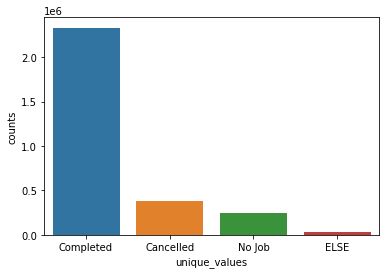

In [15]:
sns.barplot(x='unique_values', y = 'counts',data=target_count)

In [9]:
#target variable
round(data['TargetVariable'].value_counts()/data.shape[0],3)

Completed    0.776
Cancelled    0.129
No Job       0.083
ELSE         0.012
Name: TargetVariable, dtype: float64

In [10]:
#check misssing data
print(data.isnull().sum())

BookingID                   0
BookingSource               0
Conditions                  0
HasCondition                0
IsAccountBooking            0
CreatedDate                 0
RequestedDate               0
BookingFleet                0
DispatchFleet               0
VehicleID                   0
DriverID                    0
AreaNumber                  0
PuPlace                     0
PuAddress                   0
PuSuburb                    0
PuLat                       0
PuLong                      0
DestPlace                   0
DestAddress                 0
DestSuburb                  0
DestLat                106857
DestLong               106857
AccTime                     0
AccArea                     0
AccDistanceFromJob          0
PupTime                     0
DelTime                     0
DelJobDistance              0
DelJobTime                  0
ChargesPrice                0
ChargesExtras               0
ChargesFlagfall             0
Tolls                       0
Tips      

## 1 Univariate Analysis

## 1.1 Time

In [11]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype
data['CreatedDate']=pd.to_datetime(data['CreatedDate'])
data['RequestedDate']=pd.to_datetime(data['RequestedDate'])
data['PupTime']=pd.to_datetime(data['PupTime'])
data['DelTime']=pd.to_datetime(data['DelTime'])

In [12]:
# Creating features based on day
data['create_by_day'] = data['CreatedDate'].dt.day_name()
data['request_by_day'] = data['RequestedDate'].dt.day_name()
data['PupTime_by_day'] = data['PupTime'].dt.day_name()
data['DelTime_by_day'] = data['DelTime'].dt.day_name()

In [13]:
# Creating features based on Hour
data['create_by_hour'] = data['CreatedDate'].dt.hour
data['request_by_hour'] = data['RequestedDate'].dt.hour
data['PupTime_by_hour'] = data['PupTime'].dt.hour
data['DelTime_by_hour'] = data['DelTime'].dt.hour
#Morning, which starts at 6:01 am and ends at 12:oopm
#Afternoon, which starts at 12:01 pm and ends at 18:00pm
#Evening, which starts at 18:01 and ends at 21:00pm
#Night, which start at 21:01 and ends at 6:00am

In [14]:
def part_of_day (t):
    if t in range (6,12):
        return "Morning"
    elif t in range (12,18):
        return "Afternoon"
    elif t in range (18,21):
        return "Evening"
    else:
        return "Night"

In [15]:
data['create_part_of_day']=data['create_by_hour'].apply(part_of_day)
data['request_part_of_day']=data['request_by_hour'].apply(part_of_day)
data['PupTime_part_of_day']=data['PupTime_by_hour'].apply(part_of_day)
data['DelTime_part_of_day']=data['DelTime_by_hour'].apply(part_of_day)

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

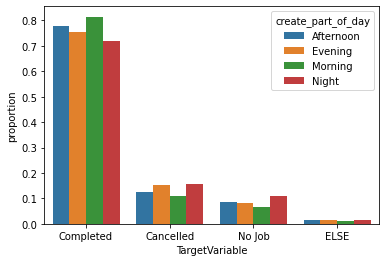

In [17]:
# create_part_of_day
(data['TargetVariable']
 .groupby(data['create_part_of_day'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='create_part_of_day'))

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

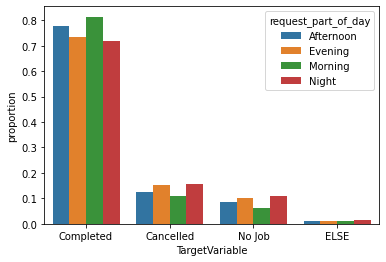

In [18]:
# request_part_of_day
(data['TargetVariable']
 .groupby(data['request_part_of_day'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='request_part_of_day'))

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

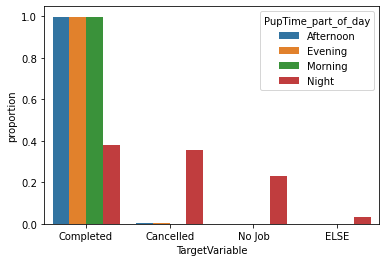

In [19]:
#PupTime_part_of_day
(data['TargetVariable']
 .groupby(data['PupTime_part_of_day'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='PupTime_part_of_day'))

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

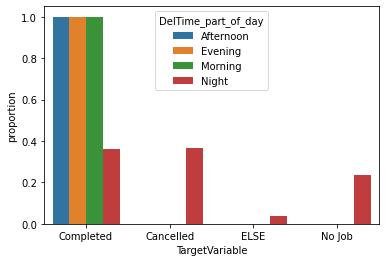

In [20]:
#DelTime_part_of_day
(data['TargetVariable']
 .groupby(data['DelTime_part_of_day'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='DelTime_part_of_day'))

## 1.2 Location

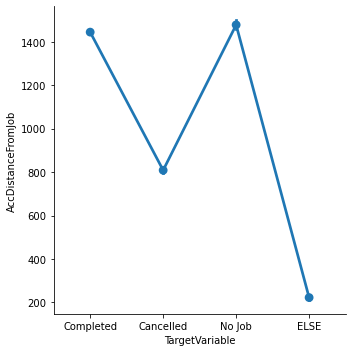

In [22]:
sns.catplot(x="TargetVariable", y='AccDistanceFromJob', kind="point", data=data)

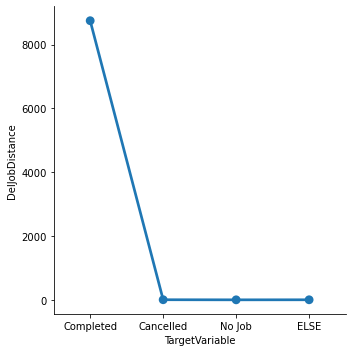

In [21]:
sns.catplot(x="TargetVariable", y='DelJobDistance', kind="point", data=data)

In [25]:
destlat = data['DestLat'].dropna()
destlong = data['DestLong'].dropna()

In [26]:
# reading training data
latlong = np.array(destlat, destlong)

# cut off long distance trips
lat_low, lat_hgh = np.percentile(destlat, [2,98])
lon_low, lon_hgh = np.percentile(destlong, [2, 98])

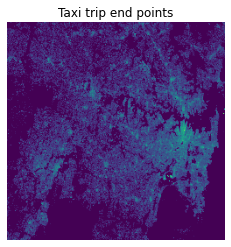

In [27]:
# create image
bins =250
lat_bins = np.linspace(lat_low, lat_hgh, bins)
lon_bins = np.linspace(lon_low, lon_hgh, bins)
H2, _, _ = np.histogram2d(destlat, destlong, bins=(lat_bins, lon_bins))

img = np.log(H2[::-1, :] + 1)

plt.figure()
ax = plt.subplot(1,1,1)
plt.imshow(img)
plt.axis('off')
plt.title('Taxi trip end points')
plt.savefig("taxi_trip_end_points.png")

## 1.3 No destination records

In [28]:
# categorize if there is a destination record
loc_target = data[['DestLat','TargetVariable']]
loc_target['Null'] = loc_target['DestLat'].isnull()

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

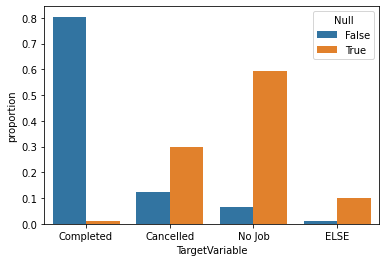

In [30]:
(loc_target['TargetVariable']
 .groupby(loc_target['Null'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='Null'))

## 1.4 DelJobDistance

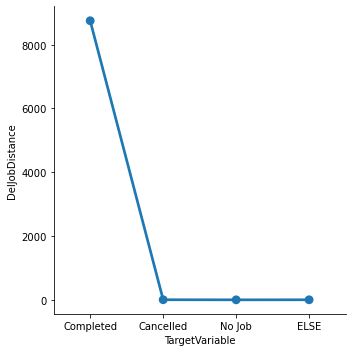

In [32]:
sns.catplot(x="TargetVariable", y='DelJobDistance', kind="point", data=data)

## 1.5 DelJobTime

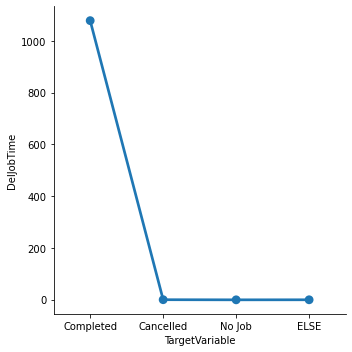

In [33]:
sns.catplot(x="TargetVariable", y='DelJobTime', kind="point", data=data)

## 1.6 ChargesPrice	

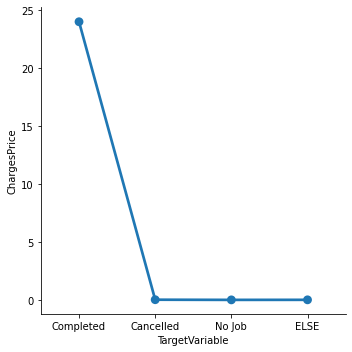

In [34]:
sns.catplot(x="TargetVariable", y='ChargesPrice', kind="point", data=data)

## 1.7 ChargesExtras

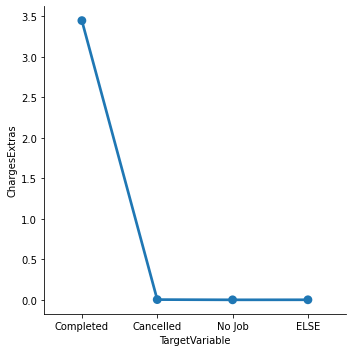

In [35]:
sns.catplot(x="TargetVariable", y='ChargesExtras', kind="point", data=data)

## 1.8 ChargesFlagfall

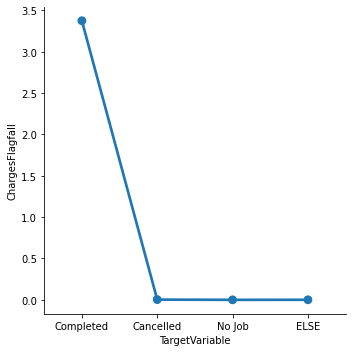

In [36]:
sns.catplot(x="TargetVariable", y='ChargesFlagfall', kind="point", data=data)

## 1.9 Tolls	

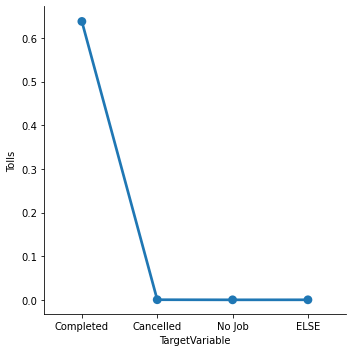

In [37]:
sns.catplot(x="TargetVariable", y='Tolls', kind="point", data=data)

## 1.11 Tips	

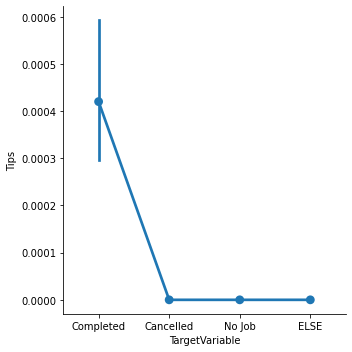

In [38]:
sns.catplot(x="TargetVariable", y='Tips', kind="point", data=data)

## 1.12 Discount

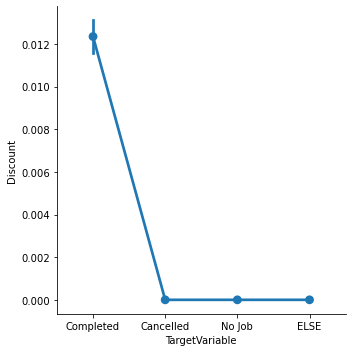

In [39]:
sns.catplot(x="TargetVariable", y='Discount', kind="point", data=data)

## 1.13 BookingSource

In [40]:
data['BookingSource'].value_counts()

Internet      1399175
TelOp         1136872
StratumIVR     458012
Permanent        5941
Name: BookingSource, dtype: int64

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

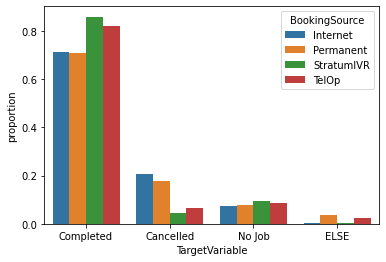

In [41]:
(data['TargetVariable']
 .groupby(data['BookingSource'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='BookingSource'))

## 1.14 Conditions    

In [44]:
data['Conditions'].value_counts().head(30)
# 64 Endorsed Driver Driver is qualified for account work
# 4194304 Premium $11 Booking Fee
# 262144  Wheelchair Accredited Zero200 Wheelchair Accredited
# 16777216 5 seater 5 Seat Vehicle Required


0               2240288
4194304          304956
64               101869
262144            88487
16777216          38880
1024              33653
274877906944      31661
274877907008      21350
33554432          16982
524288            15005
268435456         14313
1048576           13986
67108864          12937
4                 11153
134217728          7312
2                  7134
536870912          5920
274882101248       4614
4294967296         2927
131072             1817
16384              1759
137438953472       1700
1028               1685
8192               1597
16777220           1492
68719476736        1402
20971520            854
274882101312        842
16777218            732
549772591104        656
Name: Conditions, dtype: int64

## 1.15 HasCondition 

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

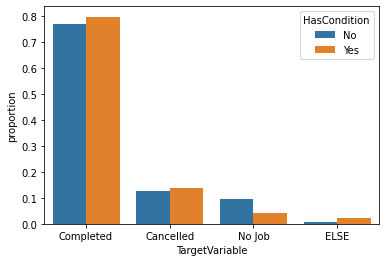

In [45]:
(data['TargetVariable']
 .groupby(data['HasCondition'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='HasCondition'))

## 1.16 IsAccountBooking 

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

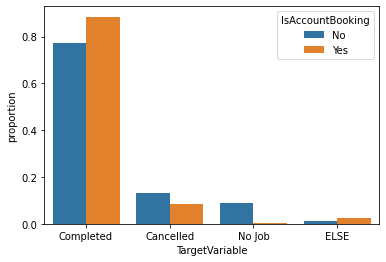

In [46]:
(data['TargetVariable']
 .groupby(data['IsAccountBooking'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='IsAccountBooking'))

## 1.17 BookingFleet

In [23]:
#target variable
booking_fleet = data['BookingFleet'].value_counts().rename_axis('unique_values').reset_index(name='counts')
booking_fleet

,unique_values,counts
0,13cabs Sydney,2766068
1,WATs Sydney,118037
2,Silver Service Sydney,90881
3,Blue Mountains 13cabs,21352
4,Training Sydney,2416
5,South Western Cabs,814
6,iHail,304
7,Test Sydney,96
8,13cabs Wollongong,17
9,Sydney Tiger Team,15


<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

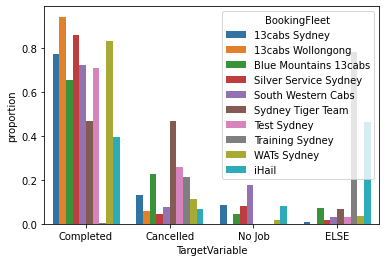

In [48]:
(data['TargetVariable']
 .groupby(data['BookingFleet'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='BookingFleet'))

## 1.18 DispatchFleet 

In [24]:
Dispatch_fleet = data['DispatchFleet'].value_counts().rename_axis('unique_values').reset_index(name='counts')
Dispatch_fleet

,unique_values,counts
0,13cabs Sydney,1909518
1,Silver Service Sydney,1018056
2,WATs Sydney,48182
3,Blue Mountains 13cabs,21275
4,Training Sydney,2416
5,South Western Cabs,225
6,iHail,184
7,Test Sydney,128
8,Sydney Tiger Team,15
9,13cabs Wollongong,1


<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

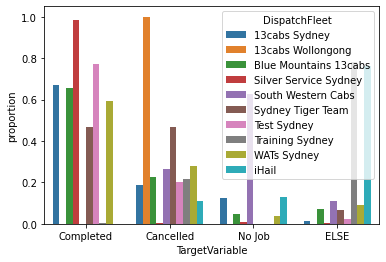

In [50]:
(data['TargetVariable']
 .groupby(data['DispatchFleet'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='DispatchFleet'))

## 1.19 PuSuburb

In [51]:
pick = data['PuSuburb'].value_counts().tail(191).keys().tolist() #<4
pick

['GREYSTANES',
 'NORTHMEAD',
 'HAYMARKET',
 'OATLANDS',
 'WESTLEIGH',
 'GLENMORE PARK',
 'Couridjah',
 'Maldon',
 'PICNIC POINT',
 'NORTH WAHROONGA',
 'MENAI',
 'MOUNT PRITCHARD',
 'ROSEVILLE CHASE',
 'Balmoral (South)',
 'LIBERTY GROVE',
 'MOUNT ANNAN',
 'Belimbla Park',
 'GLENFIELD',
 'WARRAWEE',
 'REVESBY',
 'Ebenezer',
 'ASHCROFT',
 'DUNDAS VALLEY',
 'Scotland Island',
 'GLEDSWOOD HILLS',
 'BEXLEY',
 'Bobbin Head',
 'KOGARAH',
 'ENFIELD',
 'NORTH ROCKS',
 'Kurmond',
 'STANHOPE GARDENS',
 'DACEYVILLE',
 'RAMSGATE',
 'GYMEA',
 'CARINGBAH',
 'Kelso',
 'Sun Valley',
 'Port Kembla',
 'ROOTY HILL',
 'HOMEBUSH WEST',
 'Rose Bay North',
 'GREGORY HILLS',
 'ST MARYS',
 'Hartley',
 'KELLYVILLE',
 'BLACKTOWN',
 'CABRAMATTA WEST',
 'GYMEA BAY',
 'NORMANHURST',
 'GREENHILLS BEACH',
 'KAREELA',
 'CHESTER HILL',
 'NEWPORT',
 'ARCADIA',
 'CARNES HILL',
 'LILLI PILLI',
 'BLAKEHURST',
 'Theresa Park',
 'Hill Top (North)',
 'PENDLE HILL',
 'KIRRAWEE',
 'WEST HOXTON',
 'NORTH EPPING',
 'REGENTS PARK',

In [52]:
data['pick'] = np.where(data['PuSuburb'].isin(pick), True, False)

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

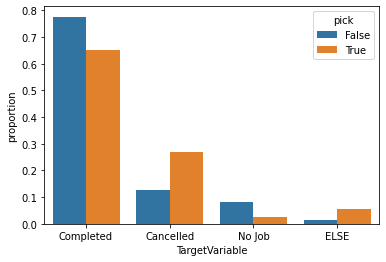

In [53]:
(data['TargetVariable']
 .groupby(data['pick'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='pick'))

## 1.20 DestSuburb

In [54]:
dest = data['DestSuburb'].value_counts().tail(334).keys().tolist() #<1
dest

['South Bathurst',
 'Pitt Town Bottoms',
 'Kincumber',
 'Woollamia',
 'East Wahroonga',
 'Rydal',
 'Wyong Creek',
 'Green Hills (South)',
 'Hillsborough',
 'Leederville',
 'GUILDFORD WEST',
 'Oak Flats',
 'Bellambi',
 'HENLEY',
 'Muswellbrook',
 'St Helens',
 'Pokolbin',
 'Blackbutt',
 'Lawrence',
 'Oberne Creek',
 'Rainbow Beach',
 'Sackville North',
 'Colo Heights',
 'Lisarow',
 'Blues Point',
 'Hampton',
 'Undercliffe',
 'Renwick',
 'SYDNEY OLYMPIC PARK',
 'SANDRINGHAM',
 'KAREELA',
 'Cringila',
 'East Ballina',
 'Smiths Lake',
 'ROUSE HILL',
 'Murrengenburg',
 'CARINGBAH',
 'Noble Park',
 'Young',
 'Concord, Sydney',
 'Toongabbie East',
 'Nort',
 'Crawley',
 'Mowbray Park',
 'Oakey Park',
 'Thredbo',
 'TELOPEA',
 'BURWOOD HEIGHTS',
 'COLLAROY',
 'Neurea',
 'The University of Sydney',
 'Huskisson',
 'Clarkson',
 'St Kilda',
 'Sackville',
 'Werombi',
 'BLAKEHURST',
 'Warranulla',
 'GREENFIELD PARK',
 'Rylstone',
 'Canton Beach',
 'HORNINGSEA PARK',
 'EAST HILLS',
 'GREYSTANES',
 'Wes

In [55]:
data['dest'] = np.where(data['PuSuburb'].isin(dest), True, False)

<AxesSubplot:xlabel='TargetVariable', ylabel='proportion'>

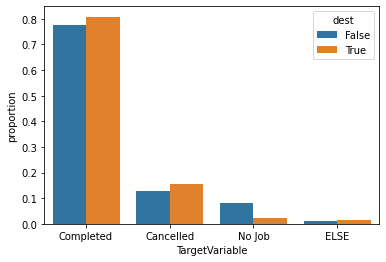

In [56]:
(data['TargetVariable']
 .groupby(data['dest'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x ='TargetVariable', y ='proportion', hue='dest'))

## 2 Multivariate Analysis

In [57]:
# Calculating the correlation
corr =data.corr()

<AxesSubplot:>

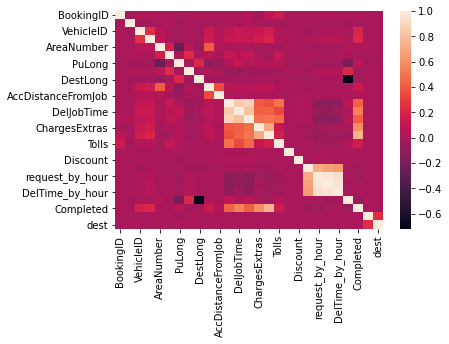

In [58]:
# Visualizing the relationship based on correlation
sns.heatmap(corr)